In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

df_dsa = pd.read_csv('dados/dataset.csv')

# Pergunta 1: Qual cidade com maior valor de venda de produtos da categoria 'Office Supplies'

In [2]:
p1 = df_dsa[df_dsa['Categoria'] == 'Office Supplies']

In [3]:
# Em seguida agrupamos por cidade e calculamos o total de valor_venda
p1_total = p1.groupby('Cidade')['Valor_Venda'].sum()

In [4]:
# Então encontramos a cidade com maior valor de venda
cidade_maior_venda = p1_total.idxmax()
print( "Cidade com maior valor de venda para 'Office Supplies':", cidade_maior_venda)

Cidade com maior valor de venda para 'Office Supplies': New York City


In [14]:
# Para conferir o resultado
p1_total.sort_values(ascending = False)

Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
                   ...    
Ormond Beach         2.808
Pensacola            2.214
Jupiter              2.064
Elyria               1.824
Abilene              1.392
Name: Valor_Venda, Length: 480, dtype: float64

# Pergunta de Negócio 2:
## Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [16]:
p2 = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum()

In [17]:
p2.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

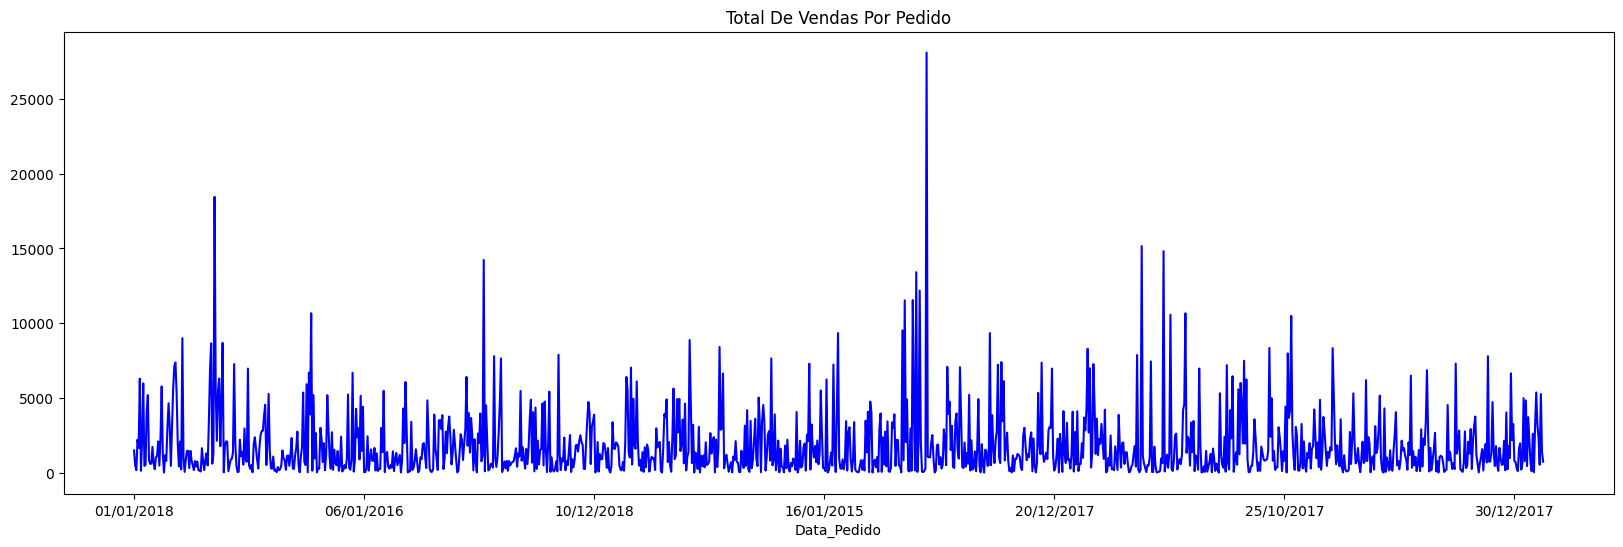

In [22]:
plt.figure(figsize = (20, 6))
p2.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'blue')
plt.title('Total De Vendas Por Pedido')
plt.show

# Pergunta de Negócio 3:
# Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

In [28]:
p3 = df_dsa.groupby('Estado')['Valor_Venda'].sum().reset_index()

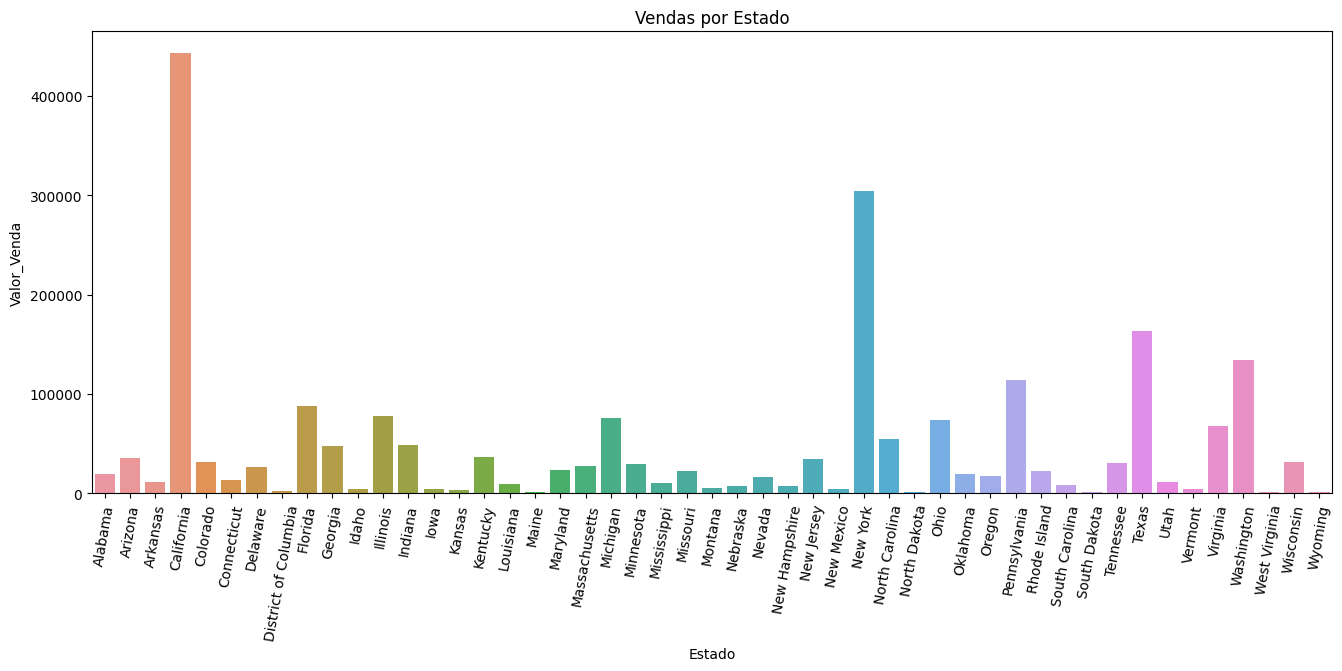

In [31]:
plt.figure(figsize = (16, 6))
sns.set_palette('coolwarm')
sns.barplot(data = p3,
            y ='Valor_Venda',
            x = 'Estado' ).set(title = 'Vendas por Estado')
plt.xticks(rotation = 80)
plt.show()

# Pergunta de Negócio 4:
# Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [32]:
p4 = df_dsa.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda',
ascending = False).head(10)

In [33]:
p4.head(10)

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


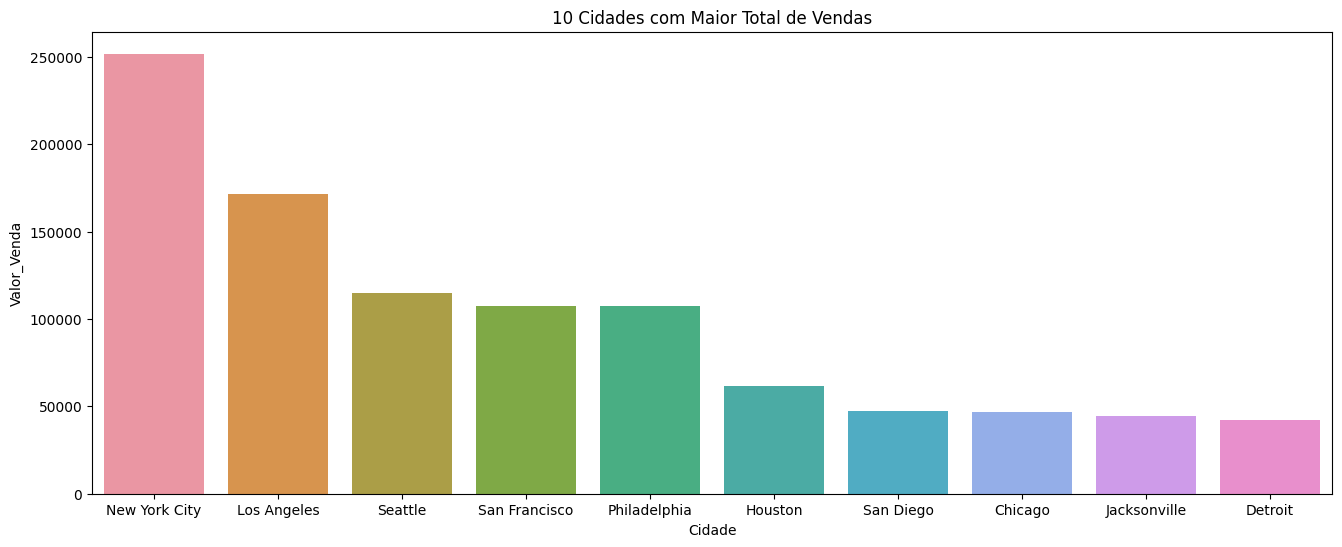

In [36]:
plt.figure(figsize = (16, 6))
sns.set_palette('coolwarm')
sns.barplot(data = p4,
            y ='Valor_Venda',
            x = 'Cidade').set(title = '10 Cidades com Maior Total de Vendas')
plt.show()

# Pergunta de Negócio 5:
# Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [37]:
p5 = df_dsa.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda',
ascending = False).head(10)

In [39]:
p5.head()

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [41]:
# Função para converter os dados em valor absoluto
def autopct_format(values) :
    def my_format (pct) :
        total = sum (values)
        val = int (round (pct * total / 100.0) )
        return '$ {vid}' .format (v = val)
        return my_format

<function matplotlib.pyplot.show(close=None, block=None)>

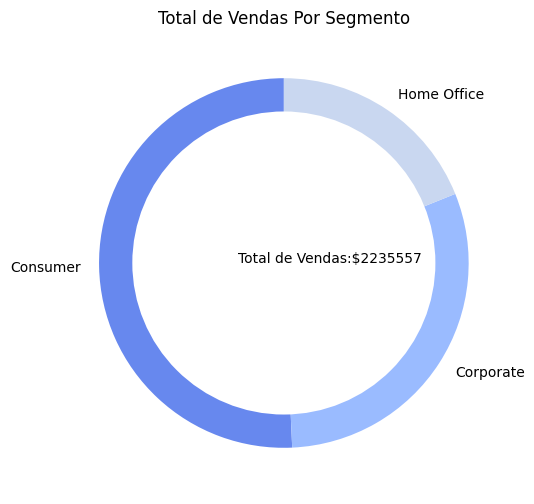

In [47]:
#Tamanho da figura 
plt.figure(figsize =(16, 6))

# Gráfico de pizza
plt.pie(p5[ 'Valor_Venda' ],labels = p5 ['Segmento'],
autopct = autopct_format(p5['Valor_Venda']),
startangle = 90)

# Limpa o círculo central
centre_circle = plt. Circle((0, 0), 0.82, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Labels e anotações
plt.annotate(text = 'Total de Vendas:' + '$' + str(int(sum(p5['Valor_Venda']))), xy = (-0.25, 0))
plt.title('Total de Vendas Por Segmento')
plt.show

# Pergunta de Negócio 6
# Qual o Total de Vendas Por Segmento e Por Ano?

In [5]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [6]:
# Convertemos a coluna de data para o tipo datetime para obter o formato adequado
df_dsa['Data_Pedido'] = pd.to_datetime(df_dsa['Data_Pedido'], dayfirst = True)

In [7]:
# Extraímos o ano criando nova variável
df_dsa['Ano'] = df_dsa[ 'Data_Pedido' ].dt.year

In [8]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [9]:
# Total de vendas por segmento e por ano
p6 = df_dsa.groupby([ 'Ano', 'Segmento' ])[ 'Valor_Venda' ].sum( )

In [10]:
p6

Ano   Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Valor_Venda, dtype: float64

# Pergunta de Negócio 7 (Desafio Nível Júnior):
# Quantas Vendas Receberiam 15% de desconto?

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

• Se o Valor_Venda for maior que 1000 recebe 15% de desconto.

• Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

In [15]:
# Cria uma nova coluna de acordo com a regra definida acima
df_dsa['Desconto'] = np.where(df_dsa[ 'Valor_Venda'] > 1000, 0.15, 0.10)
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1


In [16]:
# Total por cada valor da variável 
df_dsa['Desconto'].value_counts()

0.10    9243
0.15     457
Name: Desconto, dtype: int64

# Pergunta de Negócio 8:
# Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Vendas Antes e Depois do Desconto?

In [19]:
# Criamos uma coluna calculando o valor de venda menos o desconto
df_dsa['Valor_Venda_Desconto'] = df_dsa[ 'Valor_Venda'] - (df_dsa['Valor_Venda'] * df_dsa[ 'Desconto'])
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120


In [20]:
#Filtrando as vendas antes do desconto de 15%
p8_vendas_antes_desconto = df_dsa.loc[df_dsa['Desconto'] == 0.15, 'Valor_Venda']

In [22]:
# Filtrando as vendas depois do desconto de 15%
p8_vendas_depois_desconto = df_dsa.loc[df_dsa['Desconto'] == 0.15, 'Valor_Venda_Desconto']

In [24]:
# Calcula a média das vendas antes do desconto de 15%
media_vendas_antes_desconto = p8_vendas_antes_desconto.mean()

In [25]:
# Calcula a média das vendas depois do desconto de 15%
media_vendas_depois_desconto = p8_vendas_depois_desconto.mean()

In [27]:
print("Média das vendas antes do desconto de 15%:", round(media_vendas_antes_desconto, 2))

Média das vendas antes do desconto de 15%: 2116.81


In [28]:
print("Média das vendas depois do desconto de 15%:", round(media_vendas_depois_desconto, 2))

Média das vendas depois do desconto de 15%: 1799.29


# Pergunta de Negócio 8:
# Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

In [29]:
# Extraímos o mês e gravamos em uma nova variável
df_dsa['Mes'] = df_dsa['Data_Pedido'].dt.month

In [30]:
# Agrupamos por ano, mês e segmento e calculamos estatísticas de agregação 
p9 = df_dsa.groupby(['Ano','Mes','Segmento'])['Valor_Venda'].agg([np. sum, np.mean, np.median])

In [31]:
p9

sum        mean  median
Ano  Mes Segmento                                   
2015 1   Consumer      6896.6290  146.736787  36.440
         Corporate     1701.5280  130.886769  51.940
         Home Office   5607.5500  329.855882  62.820
     2   Consumer      3167.8540  117.327926  22.776
         Corporate      623.1180   69.235333  62.310
...                          ...         ...     ...
2018 11  Corporate    44357.9862  341.215278  79.530
         Home Office  24009.3840  247.519423  56.560
     12  Consumer     48107.4558  183.616244  52.533
         Corporate    20524.4320  153.167403  46.460
         Home Office  13022.3910  224.523983  49.260

[144 rows x 3 columns]

In [32]:
# Vamos extrair os níveis
anos = p9.index.get_level_values(0)
meses = p9.index.get_level_values(1)
segmentos = p9.index.get_level_values(2)

<Figure size 1200x600 with 0 Axes>

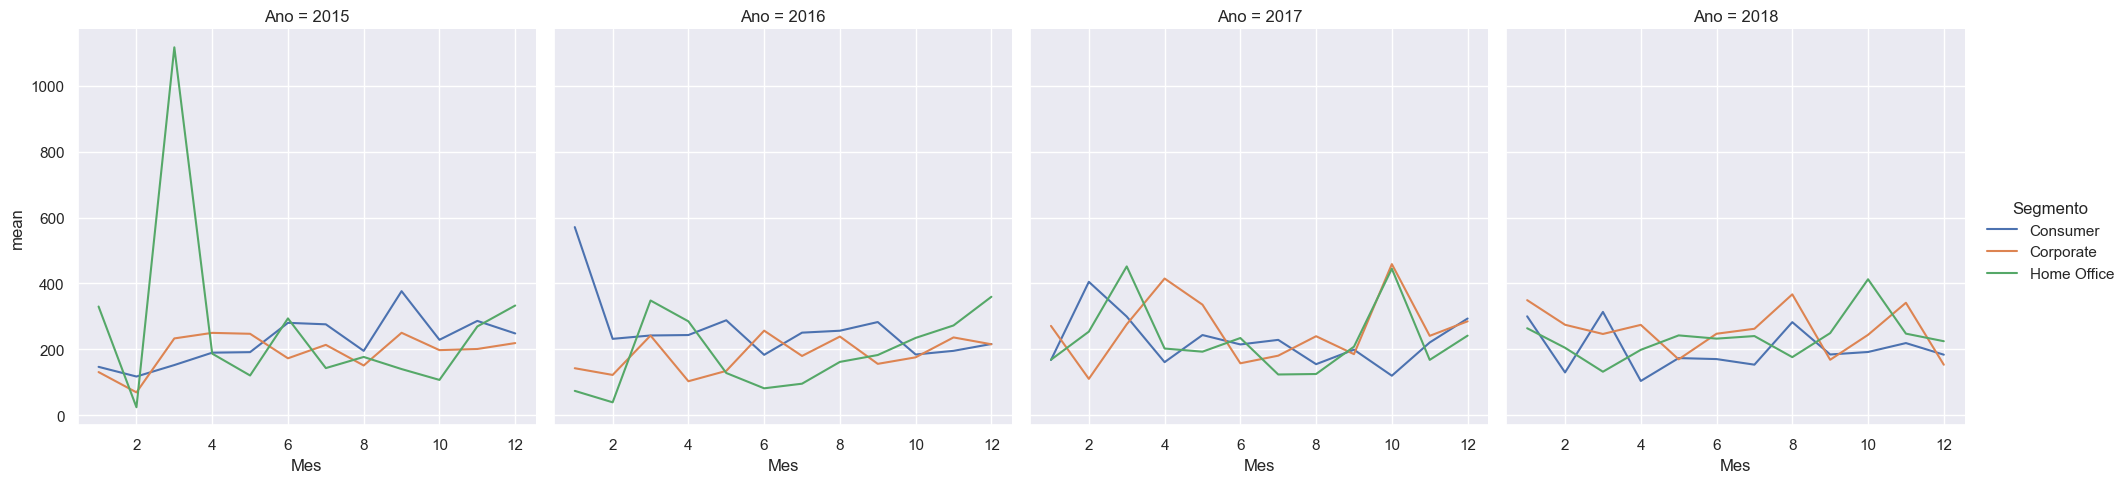

In [33]:
plt.figure(figsize = (12, 6))
sns.set()
figl = sns. relplot(kind = 'line', data = p9, y = 'mean', x = meses, hue = segmentos,
col = anos, col_wrap = 4)
plt.show()